## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata ,study_results,how="outer")
mouse_results.head(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create "Tumor" dataframe
tumor_volume = mouse_results

# Groupby Drug Regimen
tumor_volume = tumor_volume.set_index("Drug Regimen")
tumor_volume = tumor_volume.groupby("Drug Regimen")

# Calculate stats and assign to variable
tumor_mean = tumor_volume["Tumor Volume (mm3)"].mean()
tumor_median = tumor_volume["Tumor Volume (mm3)"].median()
tumor_variance = tumor_volume["Tumor Volume (mm3)"].var()
tumor_sem = tumor_volume["Tumor Volume (mm3)"].sem()
tumor_std = tumor_volume["Tumor Volume (mm3)"].std()

# Create summary statistics dataframe
tumor_summary = pd.DataFrame({
                             "Tumor Mean": tumor_mean,
                             "Tumor Median": tumor_median,
                             "Tumor Variance": tumor_variance,
                             "Tumor Standard Error": tumor_sem,
                             "Tumor Standard Deviation": tumor_std
                             })
tumor_summary


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Error,Tumor Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.322552,50.854632,42.351070,0.512884,6.507770
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


## Bar plots

Text(0, 0.5, 'Data Points')

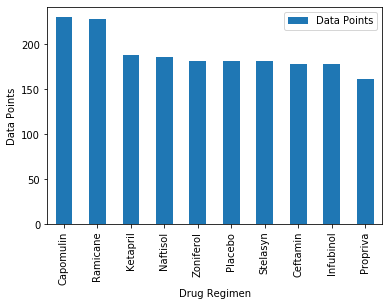

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Aggregate Data
bar_series = mouse_results["Drug Regimen"].value_counts().rename_axis('Drug Regimen').reset_index(name='Data Points')
reg = bar_series.plot(kind='bar',x='Drug Regimen',y='Data Points')
reg.set_ylabel("Data Points")


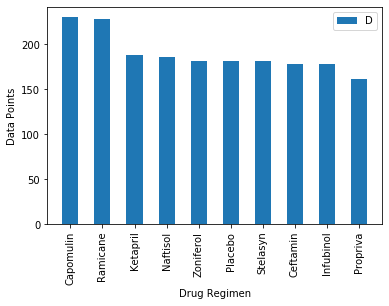

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Aggregate Data
bar_series = mouse_results["Drug Regimen"].value_counts().rename_axis('Drug Regimen').reset_index(name='Data Points')

#Assign x and y axis
x_axis = bar_series["Drug Regimen"]
y_axis = bar_series["Data Points"]

# Setup graph parameters
plt.xticks(rotation=90)

# Create Graph
bar = plt.bar(x_axis, y_axis, width=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.legend("Data Points",loc='upper right',ncol=11)

# Show bar graph
plt.show()


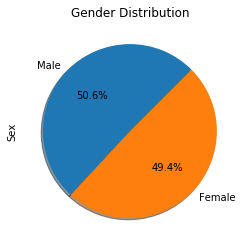

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Aggregate Data
pie_series = mouse_results["Sex"].value_counts().rename_axis('Sex')

# Display graph
plot = pie_series.plot.pie(y='Count',title="Gender Distribution", legend=False, autopct='%1.1f%%',shadow=True, startangle=45)



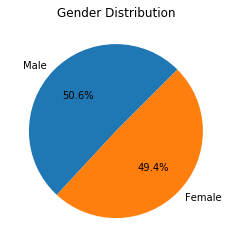

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Aggregate Data
pie_series = mouse_results["Sex"].value_counts().rename_axis('Sex').reset_index(name='Count')

# Set variables
x_axis = pie_series["Sex"]
y_axis = pie_series["Count"]

# Create Graph
plt.pie(y_axis,labels=x_axis,autopct="%1.1f%%",startangle=45)
plt.title("Gender Distribution")

# Display Graph
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.

best_regimen = mouse_results[(mouse_results["Drug Regimen"]=="Capomulin") | (mouse_results["Drug Regimen"]=="Ramicane") | 
                             (mouse_results["Drug Regimen"]=="Infubinol") | (mouse_results["Drug Regimen"]=="Ceftamin") ]
best_regimen = pd.DataFrame(best_regimen.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max())
best_regimen.reset_index(level=0, inplace=True)

final_tumor = pd.merge(best_regimen, mouse_results, on=['Mouse ID','Timepoint'], how='left', suffixes=['_and', '_or'])

# Calculate the quartiles
quartiles = final_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Display quartile results
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volumes: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

# Calculate the lower and upper 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volumes: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


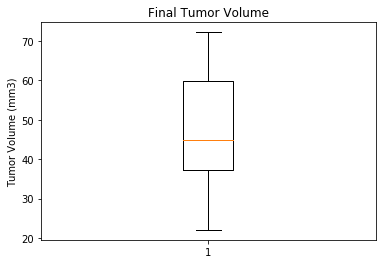

In [8]:
# Generate a box plot and whisker of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_tumor['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

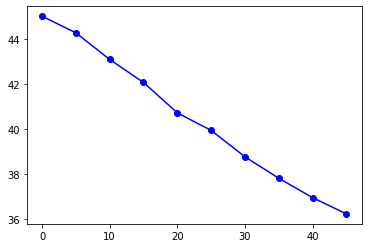

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = mouse_results[(mouse_results["Drug Regimen"]=="Capomulin") ]
#capomulin

capomulin.set_index("Timepoint")
cap_group = capomulin.groupby("Timepoint")

tumor_mean = cap_group["Tumor Volume (mm3)"].mean()
time_point = cap_group["Timepoint"].unique()

# Create summary statistics dataframe
tumor_summary = pd.DataFrame({
                             "Timepoint": time_point,
                             "Tumor Volume": tumor_mean
                             })


capomulin_line_plot, = plt.plot(tumor_summary["Timepoint"], tumor_summary["Tumor Volume"], marker ='o', color='blue', label="Sine")


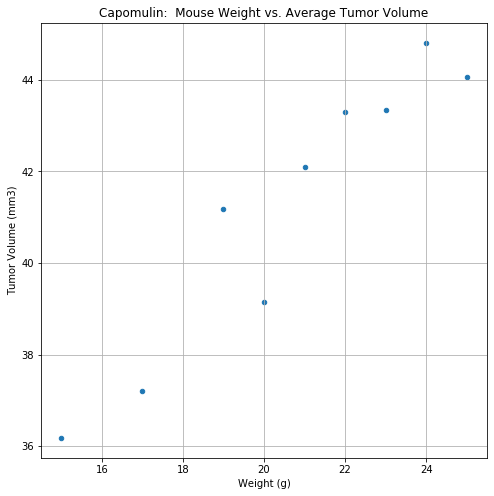

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = mouse_results[(mouse_results["Drug Regimen"]=="Capomulin") ]

capomulin = mouse_results[(mouse_results["Drug Regimen"]=="Capomulin") ]

capomulin.set_index("Weight (g)")
cap_group = capomulin.groupby("Weight (g)")

tumor_mean = cap_group["Tumor Volume (mm3)"].mean()
weight = cap_group["Weight (g)"].unique()
weight_summary = pd.DataFrame({
                             #"Weight (grams)": weight,
                             "Tumor Volume (mm3)": tumor_mean,
                             })
weight_summary = weight_summary.reset_index()
#print(weight_summary)
weight_summary.plot(kind="scatter",x="Weight (g)" , y="Tumor Volume (mm3)",grid=True,figsize=(8,8),title="Capomulin:  Mouse Weight vs. Average Tumor Volume")
plt.show()

The correlation between both factors is 0.95


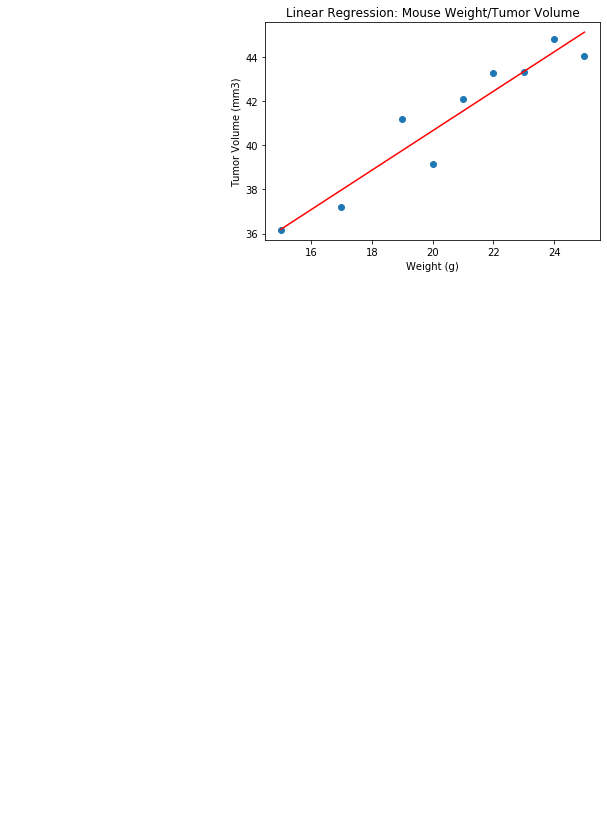

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimary

#print(weight_summary)
weight = weight_summary["Weight (g)"]
tumor_volume = weight_summary["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression: Mouse Weight/Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()